In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix

from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn import metrics

In [125]:
INPUT_DIR = "data/"

#### 1.	Загрузите датасет mall_customers

In [126]:
train = pd.read_csv(INPUT_DIR + "Mall_Customers.csv")
train

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [127]:
print(f"Размерность датасета: {train.shape}")

Размерность датасета: (200, 5)


Описательная статистика

In [128]:
train.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Медиана

In [129]:
train.median()

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

Этот метод выводит информацию о фрейме данных, включая dtype индекса и столбцы, ненулевые значения

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Количество уникальных значений по каждому столбцу

In [131]:
train.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

#### 2. Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [132]:
train.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [133]:
if sum(train.isnull().sum()) == 0:
    print("NAN в исходном датасете отсутствуют")
else: 
    print("NAN в исходном датасете присутствуют")

NAN в исходном датасете отсутствуют


### Пустых значений нет в датасете.

#### 3.	Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score. 

Переименуем название столбцов на более понятные и простые названия

In [134]:
train.rename(columns={"Annual Income (k$)" : "Annual Income", "Spending Score (1-100)" : "Spending Score"}, inplace = True)
train

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Отбор только мужчин

In [135]:
male_train = train[train["Genre"]=="Male"]
male_train

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


Отбор только женщин

In [136]:
female_train = train[train["Genre"]=="Female"]
female_train

,CustomerID,Genre,Age,Annual Income,Spending Score
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


Точечная диаграмма с выделением мужчин синим цветом, а женщин оранжевым

Text(0.5, 1.0, 'График графической интерпретации значений датасета')

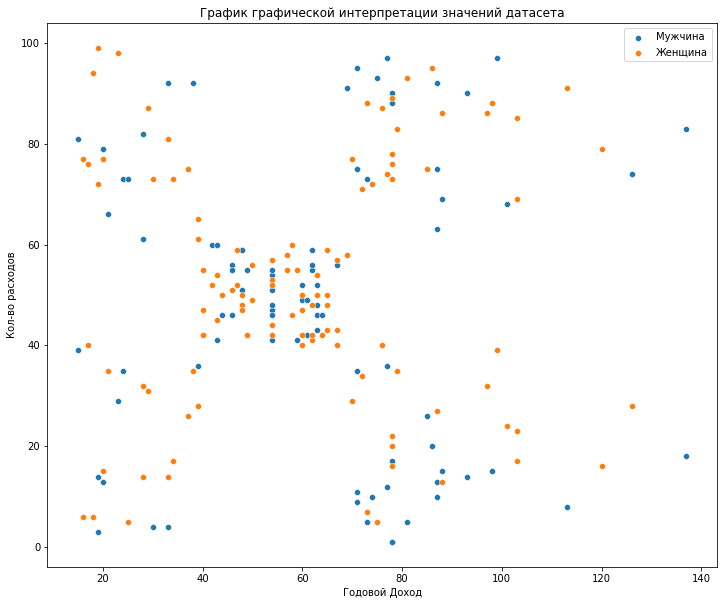

In [137]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=male_train, x="Annual Income", y="Spending Score", label="Мужчина")
sns.scatterplot(data=female_train, x="Annual Income", y="Spending Score", label="Женщина")
plt.xlabel("Годовой Доход")
plt.ylabel("Кол-во расходов")
plt.title("График графической интерпретации значений датасета")

#### 4.	Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

In [138]:
x = train[["Annual Income", "Spending Score"]]
x

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Значения суммы квадратов расстояний')

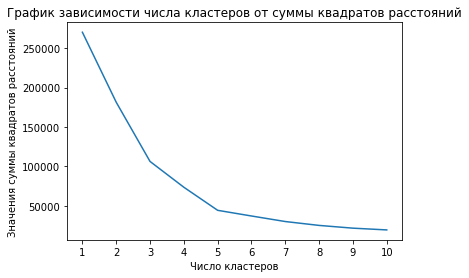

In [139]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=42)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
    
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('График зависимости числа кластеров от суммы квадратов расстояний')
plt.xlabel('Число кластеров')
plt.ylabel('Значения суммы квадратов расстояний')

#### 5.	Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

Обучение на числе кластеров равных 5

In [140]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
y_kmeans

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

#### 6.	Построить графическую интерпретацию из пункта 3,  с центрами кластеров. 

Text(0, 0.5, 'Кол-во расходов')

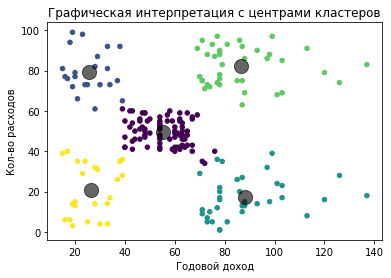

In [141]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.title('Графическая интерпретация с центрами кластеров')
plt.xlabel('Годовой доход')
plt.ylabel('Кол-во расходов')

Cуммы квадратов расстояний

In [142]:
kmeans.inertia_

44448.45544793369

#### Средний коэффициент силуэта: 

1) Чем ближе к 1, тем лучше

2) Чем ближе к -1, тем хуже

In [143]:
metrics.silhouette_score(x, kmeans.labels_)

0.553931997444648

Проверка того, насколько хорошо была проведена кластеризация

In [144]:
metrics.calinski_harabasz_score(x, kmeans.labels_)

247.35899338037282

#### 7.	Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

In [145]:
x1 = train[["Age", "Spending Score", "Genre"]]
x1

,Age,Spending Score,Genre
0,19,39,Male
1,21,81,Male
2,20,6,Female
3,23,77,Female
4,31,40,Female
...,...,...,...
195,35,79,Female
196,45,28,Female
197,32,74,Male
198,32,18,Male


Точечная диаграмма зависимости возраста от кол-ва трат с выделением мужчин синим цветом, а женщин оранжевым

Text(0.5, 1.0, 'График графической интерпретации значений датасета')

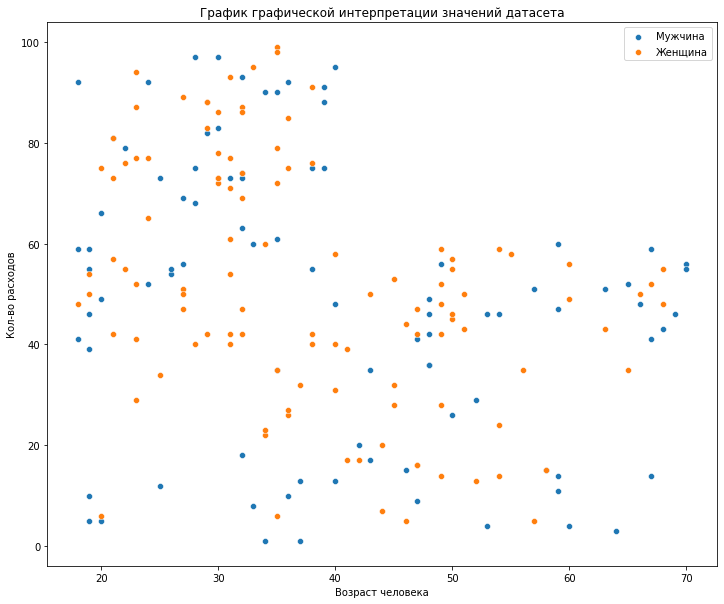

In [146]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=x1[x1["Genre"] == "Male"], x="Age", y="Spending Score", label = "Мужчина")
sns.scatterplot(data=x1[x1["Genre"] == "Female"], x="Age", y="Spending Score", label = "Женщина")
plt.xlabel("Возраст человека")
plt.ylabel("Кол-во расходов")
plt.title("График графической интерпретации значений датасета")

In [147]:
x1 = x1.drop(["Genre"], axis=1)
x1

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


Text(0, 0.5, 'Значения суммы квадратов расстояний')

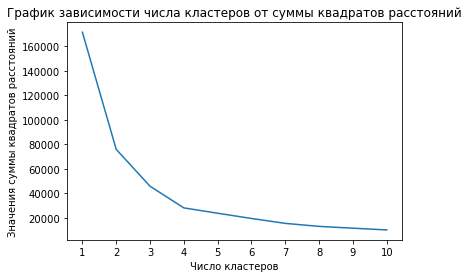

In [148]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=42)
    k_means.fit(x1)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.title('График зависимости числа кластеров от суммы квадратов расстояний')
plt.xlabel('Число кластеров')
plt.ylabel('Значения суммы квадратов расстояний')

Обучение на числе кластеров равных 4

In [149]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x1)
y_kmeans = kmeans.predict(x1)
y_kmeans

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Text(0, 0.5, 'Кол-во расходов')

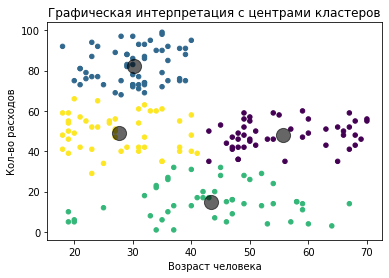

In [150]:
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6)
plt.title('Графическая интерпретация с центрами кластеров')
plt.xlabel('Возраст человека')
plt.ylabel('Кол-во расходов')

#### 8.	Оцените модель с помощью метрик.

Cуммы квадратов расстояний

In [151]:
kmeans.inertia_

28165.583566629342

#### Средний коэффициент силуэта:
1) Чем ближе к 1, тем лучше

2) Чем ближе к -1, тем хуже

In [152]:
metrics.silhouette_score(x1, kmeans.labels_)

0.49973941540141753

Проверка того, насколько хорошо была проведена кластеризация

In [153]:
metrics.calinski_harabasz_score(x1, kmeans.labels_)

332.5631268443306

#### 9.	Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

#### Сравнение результатов метрик моделей с разным количеством кластеров по 3 наиболее значимым столбцам

Создаем датафрейм по 3 столбцам

In [154]:
x2 = train.drop(['Genre', 'CustomerID'], axis=1)
x2

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Переименовываем названия столбцов Annual Income (k$), Spending Score (1-100) на более простые названия

In [155]:
x2.rename(columns={"Annual Income (k$)" : "Annual Income", "Spending Score (1-100)" : "Spending Score"}, inplace = True)
x2

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Text(0, 0.5, 'Средний коэффициент силуэта')

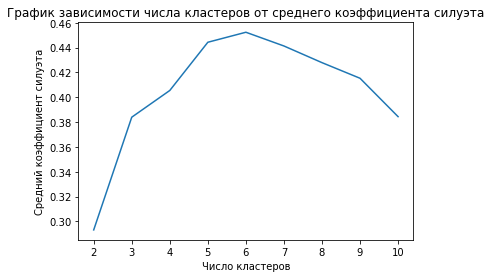

In [156]:
n_clusters = []
scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x2)
    n_clusters.append(i)
    scores.append(metrics.silhouette_score(x2, kmeans.labels_))

plt.plot(n_clusters, scores)
plt.title('График зависимости числа кластеров от среднего коэффициента силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Средний коэффициент силуэта')

Text(0, 0.5, 'Индекс Калински-Харабаса')

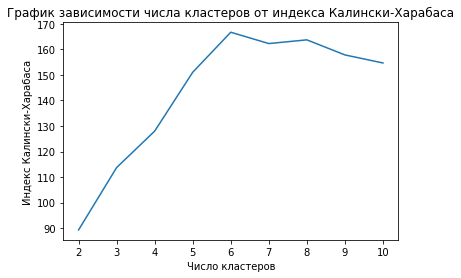

In [157]:
n_clusters = []
scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x2)
    n_clusters.append(i)
    scores.append(metrics.calinski_harabasz_score(x2, kmeans.labels_))

plt.plot(n_clusters, scores)
plt.title('График зависимости числа кластеров от индекса Калински-Харабаса')
plt.xlabel('Число кластеров')
plt.ylabel('Индекс Калински-Харабаса')

In [158]:
my_metrics_list = []
for i in range(2, 11):
    k_means = KMeans(n_clusters=i,random_state=42)
    k_means.fit(x2)
    y_kmeans = k_means.predict(x2)

    my_metrics_list.append({'Средний коэффициент силуэта': metrics.silhouette_score(x2, k_means.labels_),'Индекс Калински-Харабаса': metrics.calinski_harabasz_score(x2, k_means.labels_),'Инерция': k_means.inertia_})
    result = pd.DataFrame(data=my_metrics_list, columns=['Средний коэффициент силуэта', 'Индекс Калински-Харабаса', 'Инерция'])
result.index = pd.Series(range(2, 11))
result

,Средний коэффициент силуэта,Индекс Калински-Харабаса,Инерция
2,0.293166,89.280970,212840.169821
3,0.383935,113.705071,143342.751572
4,0.405463,127.983829,104366.151456
5,0.444286,151.043860,75350.779172
6,0.452344,166.720493,58300.443322
7,0.441281,162.285204,51084.505955
8,0.427864,163.740463,44307.873417
9,0.415286,157.841372,40573.697665
10,0.384377,154.681541,37085.627977


### Вывод: 
Определим наиболее оптимальное количество кластеров. Определять будем по среднему коэффициенту силуэта, а так же, индексу Калински-Харабаса.

1) По результату метрики среднего коэффициента силуэта, самое лучшее значение у модели с 6 кластерами, так как результата выше 0.452344 нет ни у одной модели.

2) По результату метрики индекса Калински-Харабаса, самое лучшее значение у модели с 6 кластерами, так как результата, выше 166.720493 нет ни у одной модели.

#### Соответственно, сделаем вывод, что модель с 6 кластерами самая эффективная.